Feature extraction is a process to extract important features from data. It includes identifying linguistic data and avoiding any kind of noise. Audio features are classified into 3 categories high-level, mid-level, and low-level audio features.

High-level features are related to music lyrics like chords, rhythm, melody, etc.

Mid-level features include beat level attributes, pitch-like fluctuation patterns, and MFCCs.

Low-level features include energy, a zero-crossing rate which are statistical measures that get extracted from audio during feature extraction. So to generate these features we use a certain set of steps and are combined under a single name as MFCC that helps extract mid-level and low-level audio features. below are the steps discussed for the working of MFCCs in feature extraction.

Audio files are of a certain length(duration) in seconds or as long as in minutes. And the pitch or frequency is continuously changing so to understand this we first divide the audio file into small-small frames which are near about 20 to 40 ms long.
After dividing into frames we try to identify and extract different frequencies from each frame. When we divide in such a small frame so assume that one frame divides down in a single frequency. separate linguistic frequencies from the noise
To discard any type of noise, take discrete cosine transform (DCT) of the frequencies.

### Load libraries

In [1]:
import ESC10_dataprep as ESC
import torchaudio.transforms as T
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import torch
import librosa
from sklearn.model_selection import train_test_split
import pickle

### Parameters

In [2]:
# general parameters
PATH = "data/ESC-10"

### Instantiate the Dataset object

In [3]:
dataset = ESC.ESC10Prep(PATH)

### Data exploration

In [7]:
labels = dataset.class_mapping
labels = ['Dog bark',
          'Rain',
          'Sea waves',
          'Baby cry',
          'Clock tick',
          'Person sneeze',
          'Helicopter',
          'Chainsaw',
          'Rooster',
          'Fire Cracking']

In [8]:
length = len(dataset)
length

400

In [9]:
labels[0]

'Dog bark'

In [11]:
value_counts = {}
iterator = iter(dataset)
for idx in range(0, length):
    inputs, _, targets = next(iterator)
    if targets in value_counts:
        value_counts[targets] += 1
    else:
        value_counts[targets] = 1

In [12]:
value_counts

{'Fire crackling': 40,
 'Chainsaw': 40,
 'Sea waves': 40,
 'Baby cry': 40,
 'Person sneeze': 40,
 'Rain': 40,
 'Rooster': 40,
 'Clock tick': 40,
 'Dog bark': 40,
 'Helicopter': 40}

In [ ]:
df.durations.plot()
plt.xlabel("audio file #")
plt.ylabel("duration (sec)")
plt.title("UrbanSound8K dataset: time duration each audio file")
plt.savefig("figures/durations.png", bbox_inches='tight')

In [ ]:
df['durations'].describe()

In [ ]:
df_short = df[df['durations'] < 4]
df_short

### Check if all files have the same sample rate

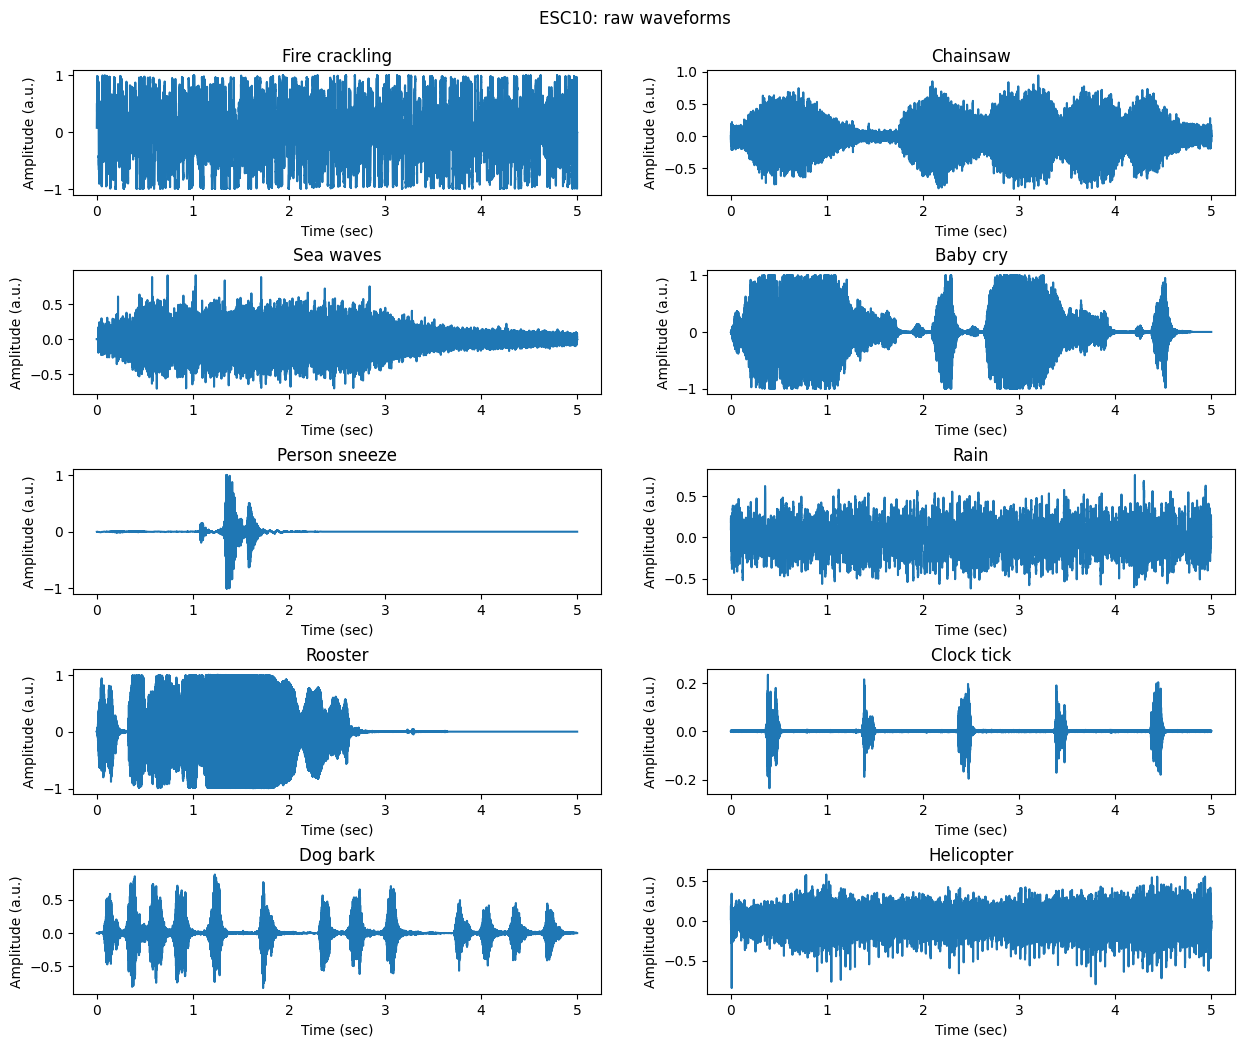

In [36]:
dataset_waves = ESC.ESC10Prep(PATH)
labels = dataset.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC10: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

plt.savefig("figures/ESC10 - unprocessed_raw_waveforms.png", bbox_inches='tight')

In [37]:
sample_rates = []
number_of_channels = []
number_of_samples = []
durations = []
for i in range(0,length):
    waveform, sample_rate, label = dataset[i]
    
    number_of_channels.append(waveform.shape[0])
    number_of_samples.append(waveform.shape[1])
    duration = waveform.shape[1] / sample_rate
    durations.append(duration)
    sample_rates.append(sample_rate)    

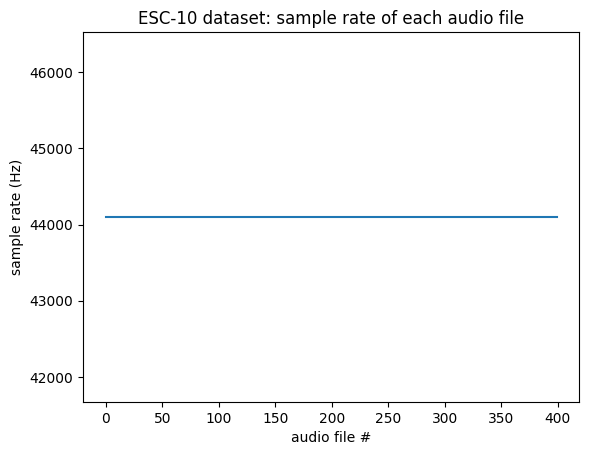

In [38]:
plt.figure()
plt.plot(sample_rates)
plt.xlabel("audio file #")
plt.ylabel("sample rate (Hz)")
plt.title("ESC-10 dataset: sample rate of each audio file")
plt.savefig("figures/ESC10 - sample_rates.png", bbox_inches='tight')

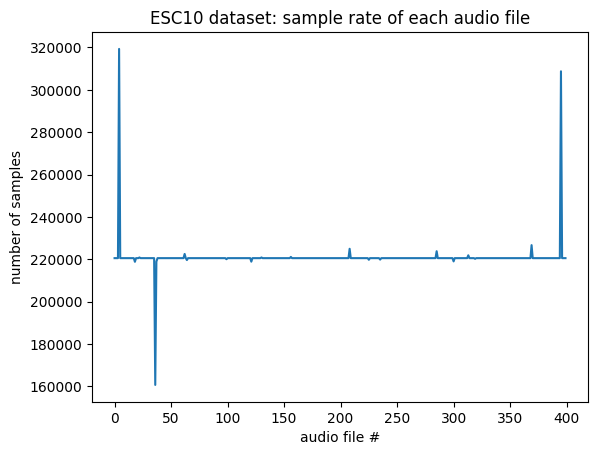

In [40]:
plt.figure()
plt.plot(number_of_samples)
plt.xlabel("audio file #")
plt.ylabel("number of samples")
plt.title("ESC10 dataset: sample rate of each audio file")
plt.savefig("figures/ESC10 - number_of_samples.png", bbox_inches='tight')

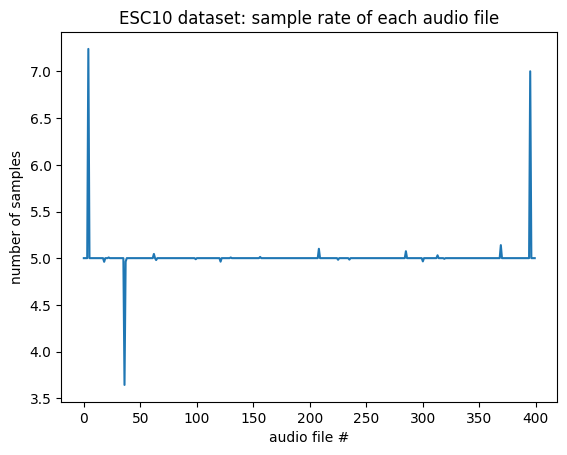

In [41]:
plt.figure()
plt.plot(durations)
plt.xlabel("audio file #")
plt.ylabel("number of samples")
plt.title("ESC10 dataset: sample rate of each audio file")
plt.savefig("figures/ESC10 - durations.png", bbox_inches='tight')

In [35]:
np.mean(number_of_samples)

220883.2

In [44]:
44100*5

220500

## Visualize the features

### Unprocessed raw waveforms

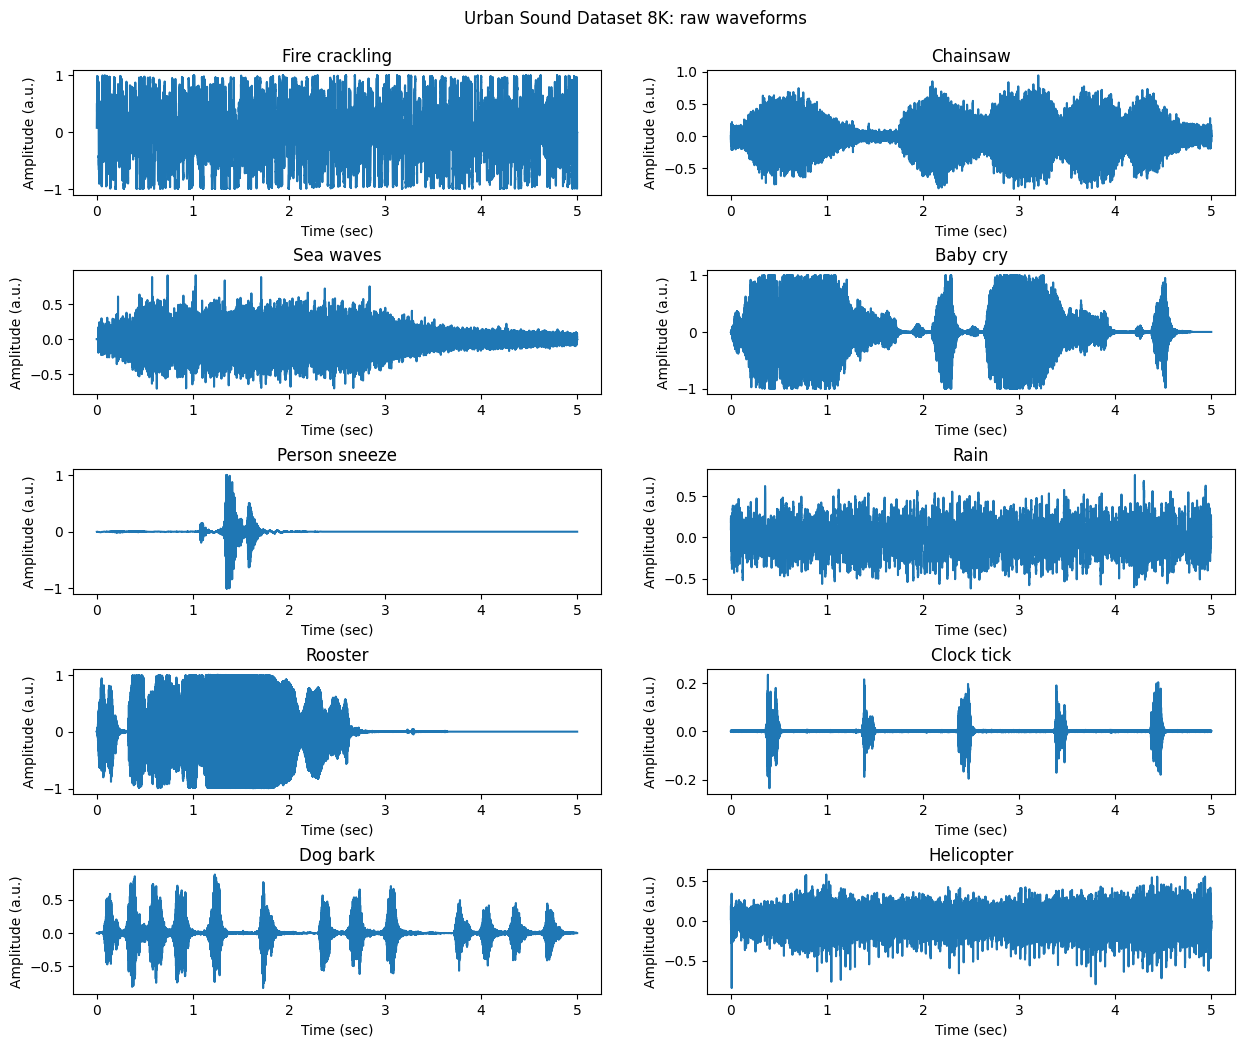

In [17]:
dataset_waves = ESC.ESC10Prep(PATH)
labels = dataset.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Urban Sound Dataset 8K: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

plt.savefig("figures/ESC10-unprocessed_raw_waveforms.png", bbox_inches='tight')

In [49]:
RESAMPLE_RATE = 44100
NUMBER_OF_SAMPLES = 110250

### Processed waveforms

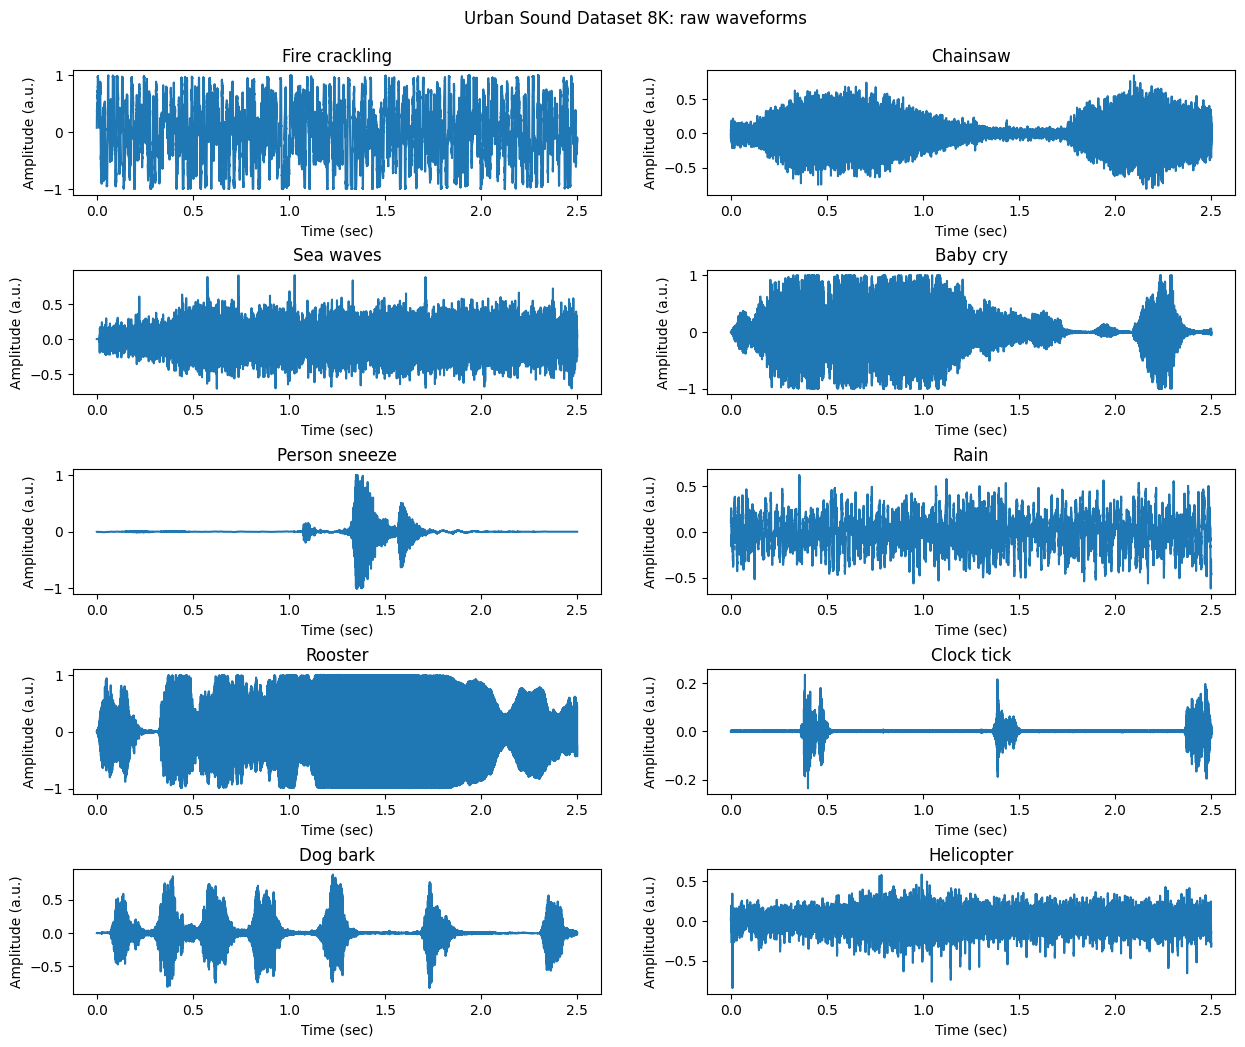

In [50]:
dataset_waves = ESC.ESC10Prep(PATH, preprocess=True, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)
labels = dataset.class_mapping

    
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("Urban Sound Dataset 8K: raw waveforms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_waves[idx]
    
    num_channels, num_frames = waveform.shape
    time_axis = torch.arange(0, num_frames) / sample_rate
    ax.plot(time_axis, waveform[0])
    ax.set_title(label)
    ax.set_xlabel('Time (sec)')
    ax.set_ylabel('Amplitude (a.u.)')

plt.savefig("figures/ESC10-processed_raw_waveforms.png", bbox_inches='tight')

## Plot Melspectrograms

In [51]:
sample_rate = 44100

n_fft = 1024
win_length = None
hop_length = 512
n_mels = 64

mel_spectrogram = T.MelSpectrogram(
    sample_rate=sample_rate,
    n_fft=n_fft,
    win_length=win_length,
    hop_length=hop_length,
    center=True,
    pad_mode="reflect",
    power=2.0,
    norm='slaney',
    onesided=True,
    n_mels=n_mels,
    mel_scale="htk",
)


dataset_melspecs = ESC.ESC10Prep(PATH, preprocess=True, transform=mel_spectrogram, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)


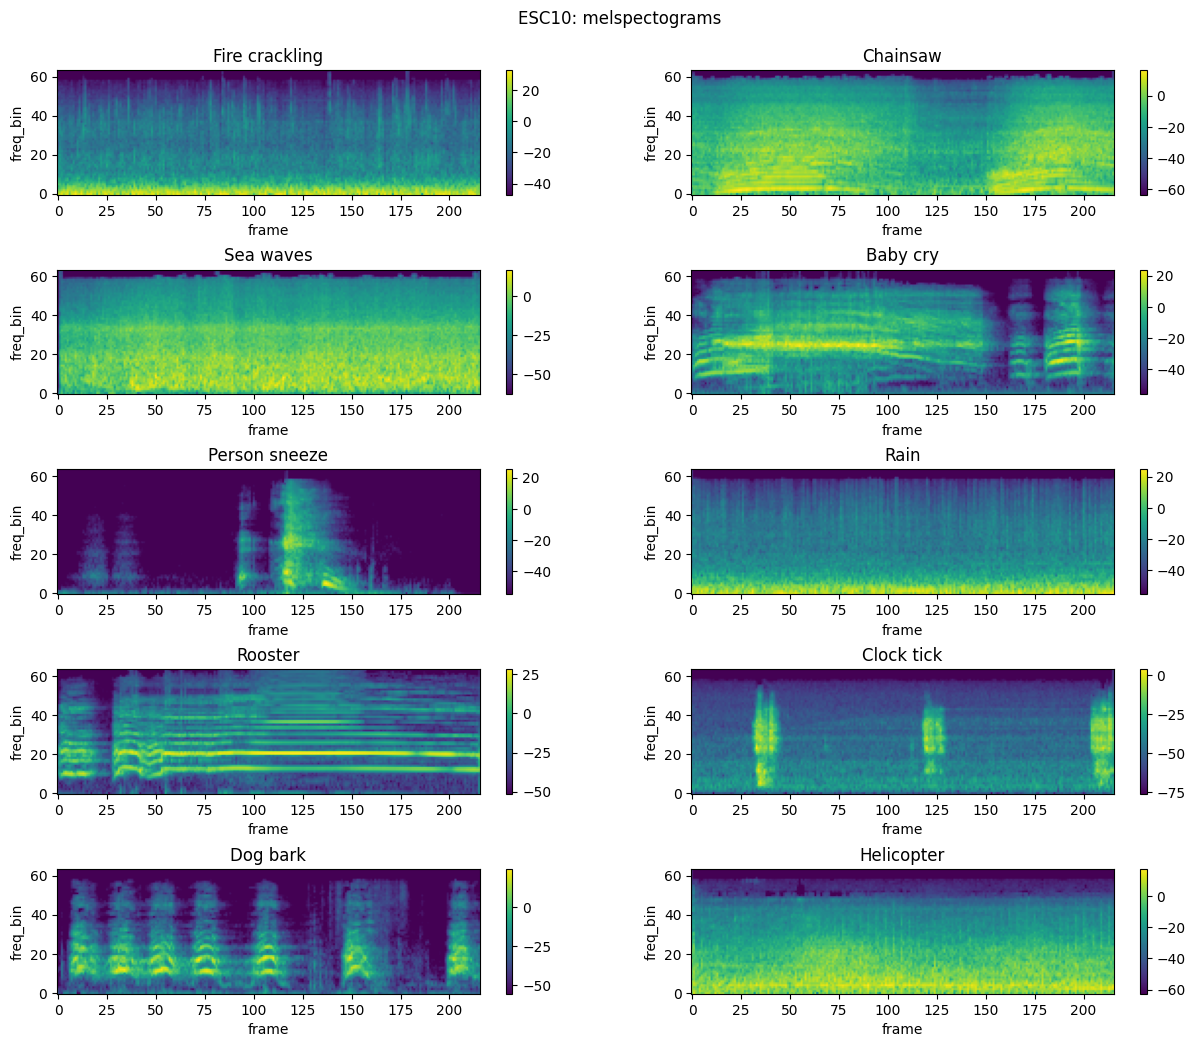

In [52]:
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC10: melspectograms", y=0.93)

for idx, ax in zip(range(0, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_melspecs[idx]
            
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)

    ax.set_title(label)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

plt.savefig("figures/ESC10-processed_melspecs.png", bbox_inches='tight')

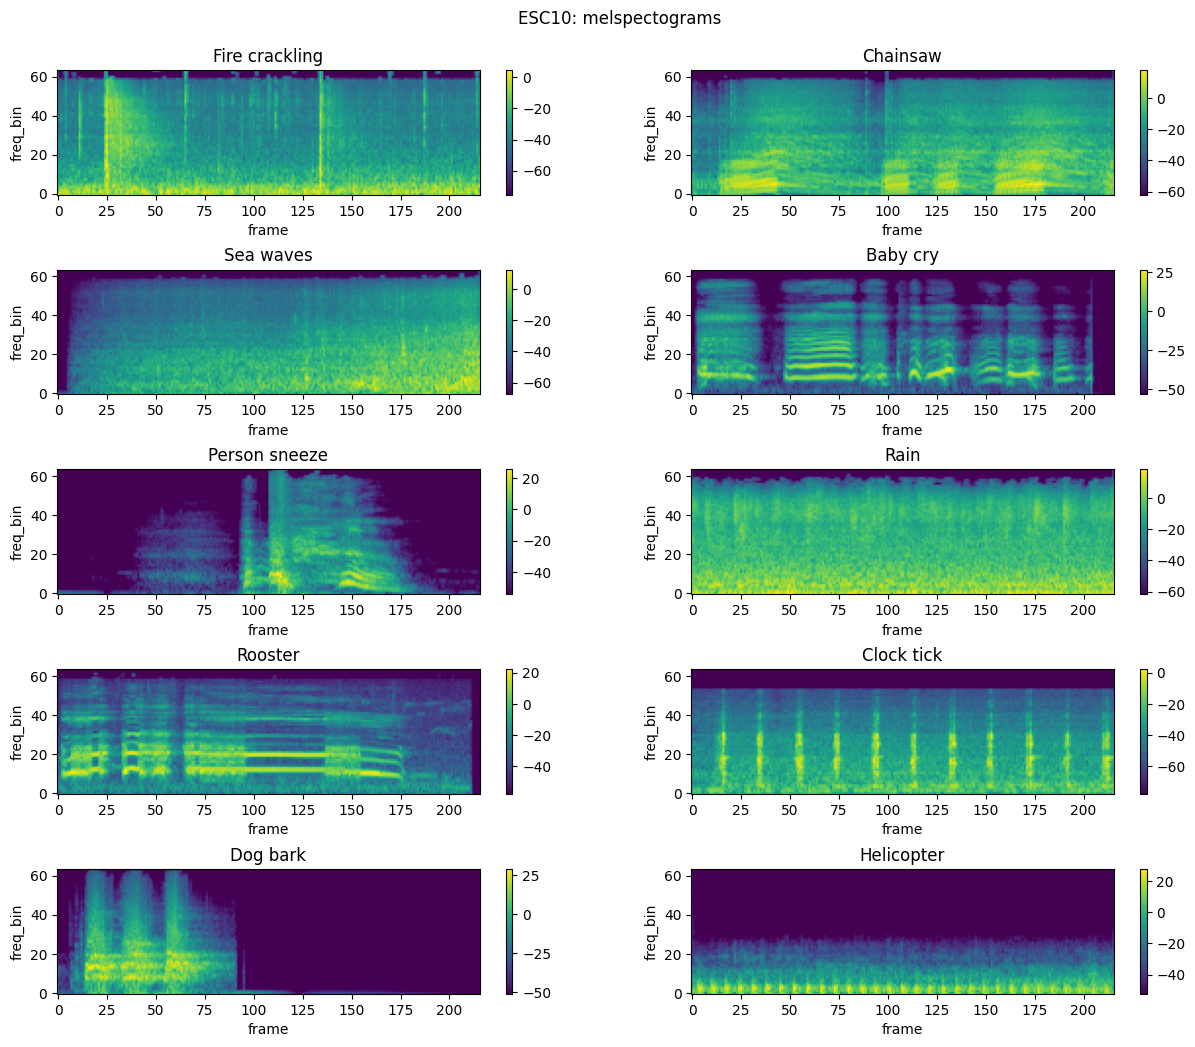

In [53]:
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC10: melspectograms", y=0.93)

for idx, ax in zip(range(5, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_melspecs[idx]
            
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)

    ax.set_title(label)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

plt.savefig("figures/ESC10-processed_melspecs.png", bbox_inches='tight')

## Plot MFCCs


In [54]:
n_fft = 2048
win_length = None
hop_length = 512
n_mels = 128
n_mfcc = 13

mfcc_transform = T.MFCC(
    sample_rate=sample_rate,
    n_mfcc=n_mfcc,
    melkwargs={
      'n_fft': n_fft,
      'n_mels': n_mels,
      'hop_length': hop_length,
      'mel_scale': 'htk',
    }
)

dataset_mfcc = ESC.ESC10Prep(PATH, preprocess=True, transform=mfcc_transform, resample_rate=RESAMPLE_RATE, number_of_samples=NUMBER_OF_SAMPLES)


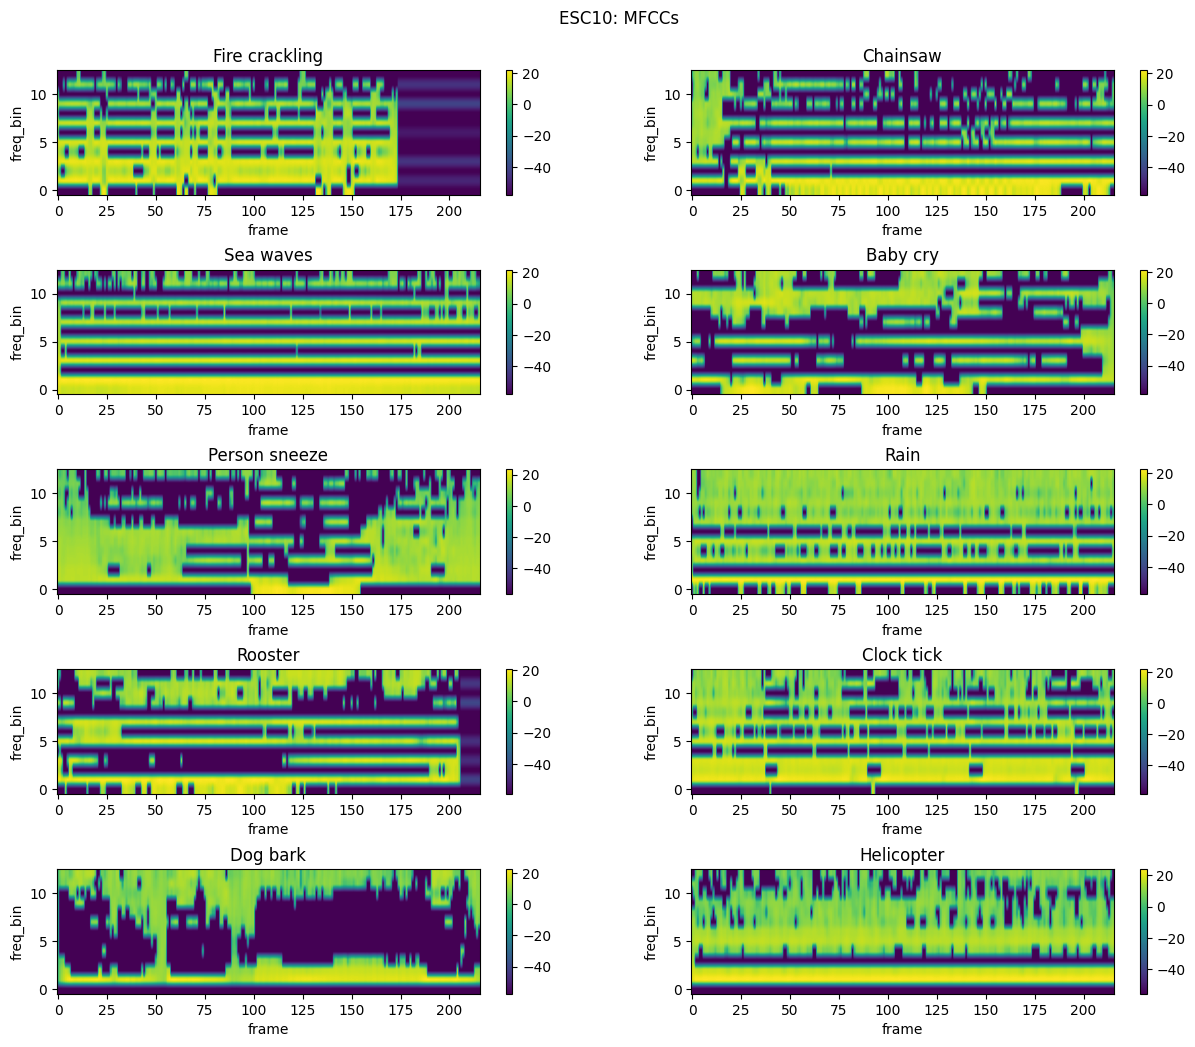

In [55]:
n_rows = int((len(labels.keys()) / 2))

fig, axs = plt.subplots(nrows=n_rows, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.6)
fig.suptitle("ESC10: MFCCs", y=0.93)

for idx, ax in zip(range(1, length, 40), axs.ravel()):
    waveform, sample_rate, label = dataset_mfcc[idx]
            
    im = ax.imshow(librosa.power_to_db(waveform[0]), origin="lower", aspect="auto")
    fig.colorbar(im, ax=ax)

    ax.set_title(label)
    ax.set_xlabel('frame')
    ax.set_ylabel('freq_bin')

plt.savefig("figures/ESC10-processed_mfcc.png", bbox_inches='tight')

### save datasets

In [ ]:
# with open('data_waves.pickle', 'wb') as handle:
#     pickle.dump(dataset_waves, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# with open('data_melspecs.pickle', 'wb') as handle:
#     pickle.dump(dataset_melspecs, handle, protocol=pickle.HIGHEST_PROTOCOL)
        
# with open('data_mfcc.pickle', 'wb') as handle:
#     pickle.dump(dataset_mfcc, handle, protocol=pickle.HIGHEST_PROTOCOL)
                
# with open('data_mfcc.pickle', 'rb') as handle:
#     b = pickle.load(handle)

In [ ]:
signal, sr, label = dataset_mfcc[1]

In [ ]:
sr

In [59]:
for idx, tensor in enumerate(dataset_melspecs):
    torch.save(tensor, f"data/ESC-10/melspecs/tensor{idx}.pt")

RuntimeError: Failed to load audio from data/ESC-10/melspecs/tensor87.pt

In [ ]:
dataset_melspecs[0]

In [62]:
for idx, tensor in enumerate(dataset_mfcc):
    torch.save(tensor, f"data/ESC-10/mfcc/tensor{idx}.pt")

RuntimeError: Failed to load audio from data/ESC-10/mfcc/tensor25.pt

In [ ]:
# for idx, tensor in enumerate(dataset_waves):
#     torch.save(tensor, f"data/waves/tensor{idx}.pt")

In [ ]:
mfcc = dataset_mfcc[0]

In [ ]:
waveform, sample_rate, label = dataset_mfcc.__getitem__(0)
im = ax.imshow(librosa.power_to_db(mfcc[0]), origin="lower", aspect="auto")
